In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
import psycopg2
import os

%load_ext autoreload
%autoreload 2

from src import util

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


35078 75659 3400



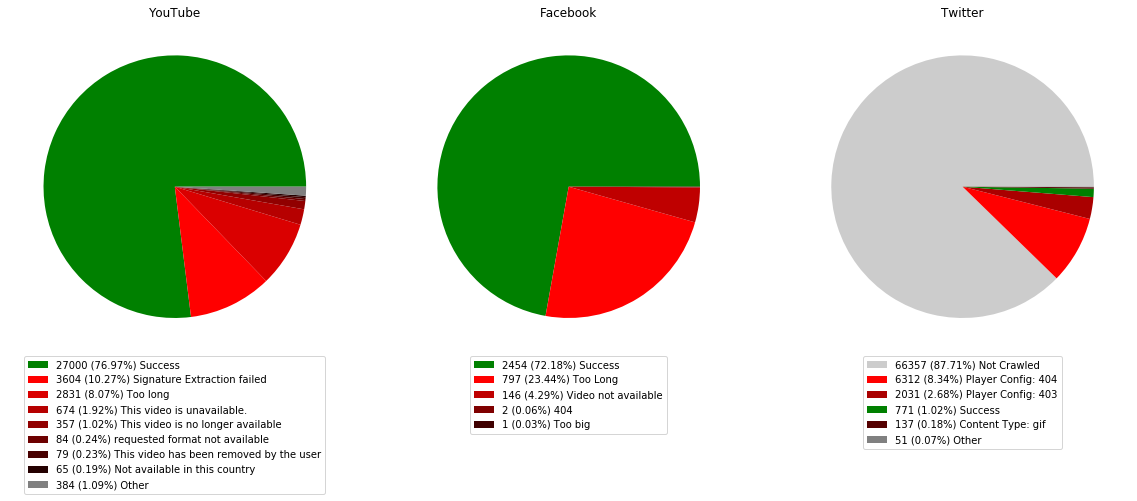

In [49]:
def shades_of_red(n):
    for i in range(n):
        value = int((n-i)/n*0xff)
        yield '#{0:02X}0000'.format(value)
        
youtube_labels = ["Success", 
                  "Signature Extraction failed", 
                  "Too long", 
                  "This video is unavailable.", 
                  "This video is no longer available",
                  "requested format not available",
                  "This video has been removed by the user",
                  "Not available in this country",
                  "Other"]
youtube = [27000,3604,2831,674,357,84, 79, 65, 384]
facebook_labels = ["Success", 
                   "Too Long", 
                   "Video not available", 
                   "404", 
                   "Too big"]
facebook = [2454,797,146,2,1]
twitter_labels = ["Not Crawled", 
                  "Player Config: 404", 
                  "Player Config: 403", 
                  "Success", 
                  "Content Type: gif", 
                  "Other"]
twitter = [66357, 6312, 2031, 771, 137, 51]

print(sum(youtube),sum(twitter), sum(facebook))
                                               
f, axarr = plt.subplots(1,3,figsize=(20,10))
print()

patches, _ = axarr[0].pie(youtube, colors=["green"] + list(shades_of_red(len(youtube)-2)) + ["grey"])
labels=["%d (%.2f%%) %s" % (value, value/sum(youtube)*100, label) for value,label in zip(youtube,youtube_labels)]
axarr[0].set_title("YouTube")
axarr[0].legend(patches, labels, bbox_to_anchor=(0.5,0),loc="upper center")

patches, _ = axarr[1].pie(facebook, colors=["green"] + list(shades_of_red(len(facebook)-1)))
labels=["%d (%.2f%%) %s" % (value, value/sum(facebook)*100, label) for value,label in zip(facebook,facebook_labels)]
axarr[1].set_title("Facebook")
axarr[1].legend(patches, labels, bbox_to_anchor=(0.5,0),loc="upper center")

patches, _ = axarr[2].pie(twitter, colors=['#CCCCCC', '#FF0000', '#AA0000', 'green', '#550000', 'grey'])
labels=["%d (%.2f%%) %s" % (value, value/sum(twitter)*100, label) for value,label in zip(twitter,twitter_labels)]
axarr[2].set_title("Twitter")
axarr[2].legend(patches, labels, bbox_to_anchor=(0.5,0),loc="upper center")

plt.savefig(os.environ['FIGURES_PATH'] + "video_status_pie.pdf", format="pdf")

In [81]:
conn = psycopg2.connect(database="gdelt_social_video", user="postgres")
c = conn.cursor()

c.execute("select duration from videos where platform='facebook' and duration notnull and duration > 0")
duration_fb = [value for value, in c.fetchall()]

c.execute("select duration from videos where platform='twitter' and duration notnull and duration > 0")
duration_twitter = [value for value, in c.fetchall()]

c.execute("select duration from videos where platform='youtube' and duration notnull and duration > 0")
duration_yt = [value for value, in c.fetchall()]

c.execute("SELECT cast(likes as float) / views FROM videos WHERE platform = 'facebook' AND likes NOTNULL AND likes >= 0 AND views NOTNULL AND views >= 1")
likes_per_view_fb = [value for value, in c.fetchall()]

c.execute("SELECT cast(likes as float) / views FROM videos WHERE platform = 'twitter' AND likes NOTNULL AND likes >= 0 AND views NOTNULL AND views >= 1")
likes_per_view_twitter = [value for value, in c.fetchall()]

c.execute("SELECT cast(likes as float) / views FROM videos WHERE platform = 'youtube' AND likes NOTNULL AND likes >= 0 AND views NOTNULL AND views >= 1")
likes_per_view_yt = [value for value, in c.fetchall()]

c.execute("SELECT cast(comments as float) / views FROM videos WHERE platform = 'facebook' AND comments NOTNULL AND comments >= 0 AND views NOTNULL AND views >= 1")
comments_per_view_fb = [value for value, in c.fetchall()]

c.execute("SELECT cast(comments as float) / views FROM videos WHERE platform = 'twitter' AND comments NOTNULL AND comments >= 0 AND views NOTNULL AND views >= 1")
comments_per_view_twitter = [value for value, in c.fetchall()]

c.execute("SELECT cast(shares as float) / views FROM videos WHERE platform = 'facebook' AND shares NOTNULL AND shares >= 0 AND views NOTNULL AND views >= 1")
shares_per_view_fb = [value for value, in c.fetchall()]

c.execute("SELECT cast(shares as float) / views FROM videos WHERE platform = 'twitter' AND shares NOTNULL AND shares >= 0 AND views NOTNULL AND views >= 1")
shares_per_view_twitter = [value for value, in c.fetchall()]

In [82]:
likes_per_view_fb[:10]

[0.0109816225907665,
 0.0017643599294256,
 0.0052374413183023,
 0.0116795244371164,
 0.00110680686220255,
 0.0105546822366944,
 0.00263019463440295,
 0.0124731182795699,
 0.00852959898154042,
 0.0102189781021898]

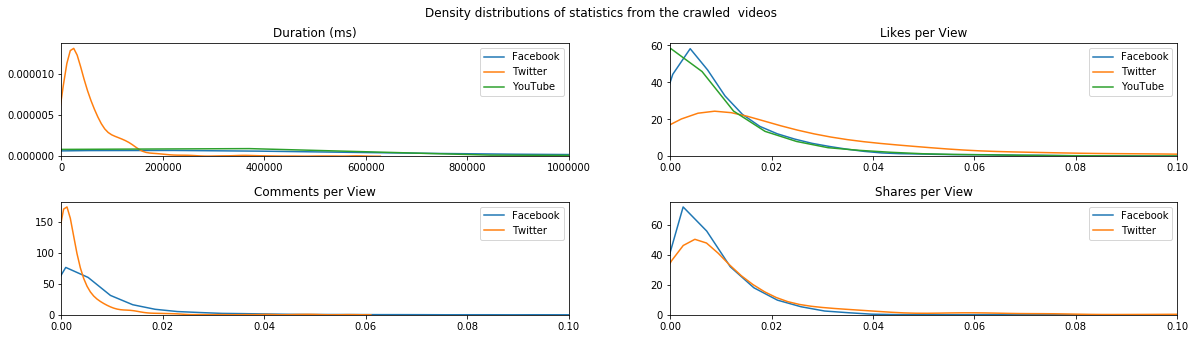

In [93]:
f, axarr = plt.subplots(2, 2, figsize=(20, 5))

sns.kdeplot(data=duration_fb, ax=axarr[0][0], label="Facebook")
sns.kdeplot(data=duration_twitter, ax=axarr[0][0], label="Twitter")
sns.kdeplot(data=duration_yt, ax=axarr[0][0], label="YouTube")
axarr[0][0].set_title("Duration (ms)")
axarr[0][0].set_xlim(0,1e6)

sns.kdeplot(data=likes_per_view_fb, ax=axarr[0][1], label="Facebook")
sns.kdeplot(data=likes_per_view_twitter, ax=axarr[0][1], label="Twitter")
sns.kdeplot(data=likes_per_view_yt, ax=axarr[0][1], label="YouTube")
axarr[0][1].set_title("Likes per View")
axarr[0][1].set_xlim(0,0.1)

sns.kdeplot(data=comments_per_view_fb, ax=axarr[1][0], label="Facebook")
sns.kdeplot(data=comments_per_view_twitter, ax=axarr[1][0], label="Twitter")
axarr[1][0].set_title("Comments per View")
axarr[1][0].set_xlim(0,0.1)

sns.kdeplot(data=shares_per_view_fb, ax=axarr[1][1], label="Facebook")
sns.kdeplot(data=shares_per_view_twitter, ax=axarr[1][1], label="Twitter")
axarr[1][1].set_title("Shares per View")
axarr[1][1].set_xlim(0,0.1)

plt.suptitle('Density distributions of statistics from the crawled  videos'); 
plt.subplots_adjust(hspace=0.4)
plt.savefig(os.environ['FIGURES_PATH'] + "video_stats_densities.pdf", format="pdf")
plt.show()